In [1]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
pd.options.display.mpl_style = 'default'
Xtrain = pd.read_csv('/home/loschen/Desktop/datamining-kaggle/numerai/numerai_datasets/numerai_training_data.csv'
                     )


/usr/local/lib/python2.7/dist-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
/usr/local/lib/python2.7/dist-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
Xtrain.head()


,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,target
0,0.436270,0.935472,0.969776,0.421522,0.265981,0.642893,0.991436,0.258860,0.903204,0.857487,...,0.123944,0.674419,0.065521,0.064110,0.194773,0.982659,0.294940,0.273712,0.710822,0
1,0.650576,0.599399,0.090959,0.340180,0.117119,0.721780,0.016785,0.690436,0.031028,0.008407,...,0.619781,0.608140,0.668743,0.736196,0.004031,0.085888,0.125526,0.015789,0.097362,0
2,0.219104,0.855200,0.259224,0.888770,0.304351,0.882074,0.651708,0.341599,0.162460,0.513674,...,0.000644,0.964616,0.035270,0.217261,0.145543,0.792258,0.235331,0.403457,0.803910,0
3,0.744964,0.843087,0.882080,0.468102,0.505749,0.721780,0.686990,0.379569,0.924480,0.976014,...,0.272693,0.756846,0.169351,0.132301,0.197564,0.797723,0.449873,0.229742,0.719336,0
4,0.168788,0.124098,0.036087,0.435902,0.752016,0.487057,0.020278,0.491390,0.026567,0.059881,...,0.423541,0.522651,0.276304,0.379740,0.720409,0.020580,0.556442,0.677559,0.080361,0


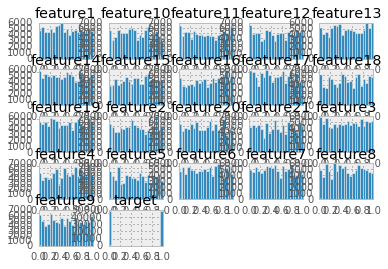

In [11]:
Xtrain.iloc[:,:].hist(bins=20)
plt.show()

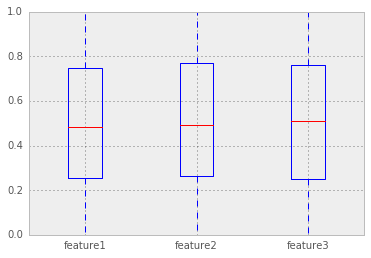

In [17]:
Xtrain[['feature1','feature2','feature3']].plot(kind='box')

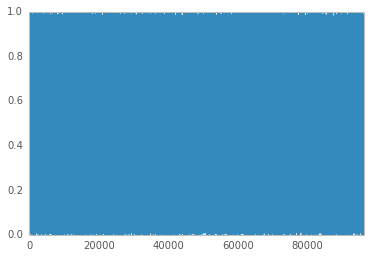

In [19]:
Xtrain.iloc[:,0].plot()

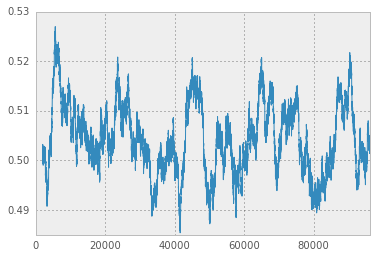

In [41]:
pd.rolling_mean(Xtrain['feature2'],2000).plot()

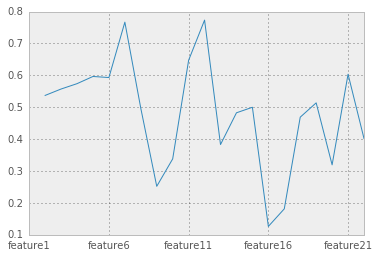

In [37]:
pd.rolling_mean(Xtrain.iloc[2,:],2).plot()

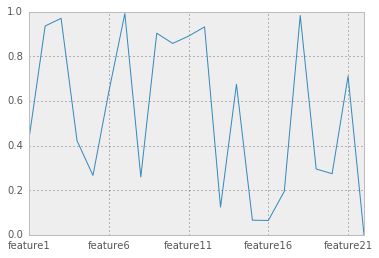

In [29]:
Xtrain.iloc[0,:].plot()

In [57]:
rm = Xtrain.apply(pd.rolling_mean,args=(1000),axis=0)

TypeError: ('roll_mean() argument after * must be a sequence, not int', u'occurred at index feature1')

In [53]:
rm.shape


(2, 22)

In [54]:
type(rm)

pandas.core.frame.DataFrame

rm

In [55]:
rm

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,target
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
pd.rolling_count

AttributeError: 'module' object has no attribute 'rolling'